# <center>Circuit Topology script V2.0</center>

<center>Duane Moes - For suggestions and further questions: moesduane@gmail.com </center><br>
<center>Github:   <a href="url" target="https://github.com/Duanetech/circuit_topology">github.com/Duanetech/circuit_topology</a></center>


---
This is a fully automated script that mainly utilizes biopython to perform circuit topology analysis on a given set of proteins. When possible, try to use the mmCIF file system instead of the PDB file option, this is because PDB is outdated and more prone to missing atoms etc.This script serves as an example, you can always create your own loop and use the functions separately if you want to. See the README for installation help and documentation of the functions. If a new update comes out, use the download code option on the github page.

#### Packages used
<ul><li>BioPython</li>
    <li>Pandas</li>
<li>SciPy </li>
<li>NumPy</li>
<li>MatPlotlib</li>
<li>DSSP</li>
</ul>


  
Run the code below to install all the needed dependencies (only once!).<br> Warning: This can take a while, if it has finished you can delete the code block.  

      


In [2]:
# Clone the GitHub repository
!git clone https://github.com/circuittopology/circuit_topology.git

# Change the working directory to the cloned repository
%cd circuit_topology

# Install required dependencies, excluding dssp
!pip install numpy scipy pyqt5 pandas biopython ipympl ipywidgets matplotlib
import pandas as pd

# Load the data
df = pd.read_csv('/content/tyrosine_phosphorylation_proteins_updated_with_additional_editeddd(5).csv')

Cloning into 'circuit_topology'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 175 (delta 31), reused 147 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (175/175), 6.79 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (31/31), done.
/content/circuit_topology/circuit_topology


#### Importing
These are import statements, you have to run this codeblock everytime you restart and/or quit Jupyter.

In [3]:
from functions.plots.circuit_plot import circuit_plot
from functions.plots.matrix_plot import matrix_plot
from functions.plots.stats_plot import stats_plot
from functions.plots.matrix_plot_model import matrix_plot_model
from functions.plots.local_topology_plot import local_topology_plot

from functions.calculating.get_cmap import get_cmap
from functions.calculating.get_matrix import get_matrix
from functions.calculating.get_stats import get_stats
from functions.calculating.energy_cmap import energy_cmap
from functions.calculating.string_pdb import string_pdb
from functions.calculating.secondary_struc_cmap import secondary_struc_cmap
from functions.calculating.secondary_struc_filter import secondary_struc_filter
from functions.calculating.glob_score import glob_score
from functions.calculating.length_filter import length_filter
from functions.calculating.contact_order import contact_order
from functions.calculating.local_ct import local_ct

from functions.importing.retrieve_chain import retrieve_chain
from functions.importing.retrieve_cif import retrieve_cif
from functions.importing.retrieve_cif_list import retrieve_cif_list
from functions.importing.retrieve_secondary_struc import retrieve_secondary_struc
from functions.importing.stride_secondary_struc import stride_secondary_struc

from functions.exporting.export_psc import export_psc
from functions.exporting.export_cmap3 import export_cmap3
from functions.exporting.export_mat import export_mat
from functions.exporting.export_cmap4 import export_cmap4
from functions.exporting.export_circuit import export_circuit

from ipywidgets import widgets
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline


## <center> User guide </center>
<ul>
    <li>Either copy your <code>.PDB</code> or <code>.CIF </code> files to their respective maps in <code>/input_files/</code>, or use the retrieve CIF function to download them.
</li>
</ul>

#### Retrieving CIF files
These Functions will automatically download the specified mmCIF files from RCSB PDB to their respective maps in <code>/input_files/</code>. <br>

<i>NOTE that when using a large number of proteins (>50), it is more efficient to use the batch download function from the <a href="url" target="https://www.rcsb.org/downloads">RCSB Db</a> </i><br>

* Use the following function to download a single mmCif file by entering the protein ID <br>

* The following function Downloads all of the mmCIF files specified in <code>input_files/protlist.txt</code>


####  ***Variable input***
These are variables used for the **Main** script. <br> It is also possible to create your own loop and see the README manual for all the functions.

<ul>
<li><code>fileformat</code> Preferred filetype, CIF is recommendend because of a possibility of missing atoms occuring in PDB files. <br></li>
    
  <br>
<li><code>cutoff_distance</code>, maximal distance (Ångström) between two atoms that will count as an atom-atom contact.<br> </li>
<li><code>cutoff_numcontacts</code>, minimum number of contacts between two residues to count as a res-res contact. <br></li>
<li><code>exclude_neighbour</code>, number of neighbours that are excluded from possbile res-res contacts. <br></li>
    <br>
<li><code>length_filtering</code> (0/1), activates length filtering.
<li><code>filtering_distance</code>, specify which max/min distance you want to use.
<li><code>length_mode</code> specifies whether you want short range filtering or long range filtering.
    <br>
    <br>
<li><code>energy_filtering</code>(0/1), activates energy filtering.</li>
 <li><code>energy_filtering_mode</code>(+/-), sets the energy filtering mode.</li>
<br>
<li><code>plot_figures</code>(0/1),Plots figures when activated. Would not recommend with large amound of files.</li>
<li><code>export_psc</code>(0/1), exporting the resulting PSC stats to a txt file located in <code>results/statistics/psc</code>       (Overwrites a previous created file)</li>
<li><code>export_cmap3</code>(0/1), exporting the Residue contact map to a csv file located in <code>results/circuit_diagram</code></li>
<li><code>export_mat</code>(0/1), exporting the topology relations matrix to a csv file located in <code>results/matrix</code></li>
</ul>

In [4]:
# Format
fileformat = 'cif'  # Preferred file type, CIF is recommended because of a possibility of missing atoms occurring in PDB files.

# CT (Circuit Topology) variables

cutoff_distance = 4.5  # Maximal distance (in Ångström) between two atoms that will count as an atom-atom contact.
cutoff_numcontacts = 5  # Minimum number of contacts between two residues to count as a residue-residue contact.
exclude_neighbour = 3  # Number of neighboring residues that are excluded from possible residue-residue contacts.

# Length Filtering
length_filtering = 0  # Activates length filtering (0 = off, 1 = on).
filtering_distance =0 # Specify which max/min distance you want to use (only used if length_filtering = 1).
length_mode = '<'  # Specifies whether you want short-range filtering or long-range filtering (only used if length_filtering = 1).

# Energy Filtering
energy_filtering = 0  # Activates energy filtering (0 = off, 1 = on).
energy_filtering_mode = '+'  # Sets the energy filtering mode, either '+' for positive or '-' for negative filtering (only used if energy_filtering = 1).

# Exporting
plot_figures = 1  # Plots figures when activated. Recommended to keep off (0) if working with a large number of files.
exporting_psc = 1  # Exports the resulting PSC statistics to a txt file located in 'results/statistics/psc' (0 = off, 1 = on).
exporting_cmap3 = 1  # Exports the residue contact map to a CSV file located in 'results/circuit_diagram' (0 = off, 1 = on).
exporting_mat = 1  # Exports the topology relations matrix to a CSV file located in 'results/matrix' (0 = off, 1 = on).



#### <center>MAIN</center>
-------


##### Single file

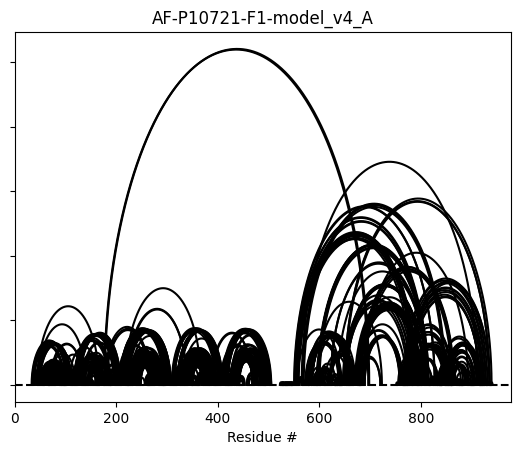

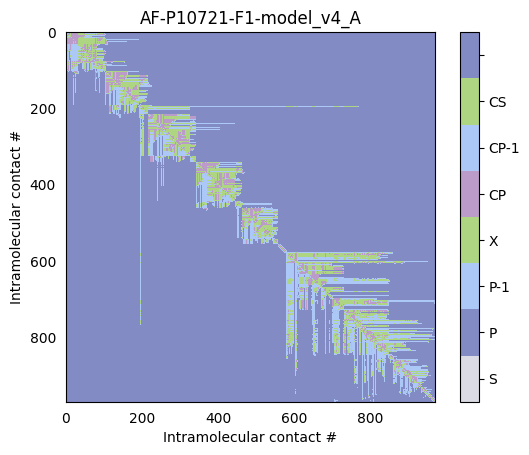

In [20]:
#Creates a chain object from a CIF/PDB file
chain,protid = retrieve_chain('AF-P10721-F1-model_v4.cif')

#Step 1 - Draw a residue-residue based contact map
index,numbering,protid,res_names = get_cmap(
                                            chain,
                                            cutoff_distance = cutoff_distance,
                                            cutoff_numcontacts = cutoff_numcontacts,
                                            exclude_neighbour = exclude_neighbour)

#Step 3 - Draw a circuit topology relations matrix
mat, psc = get_matrix(index,protid)
circuit_plot(index,protid,numbering)
matrix_plot(mat,protid)

##### Multiple files

AF-P00519-F1-model_v4.cif - 1/26
623
Succesfully saved AF-P00519-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P00519-F1-model_v4_A_mat.csv
AF-P19174-F1-model_v4.cif - 2/26
1467
Succesfully saved AF-P19174-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P19174-F1-model_v4_A_mat.csv
AF-P10721-F1-model_v4.cif - 3/26
970
Succesfully saved AF-P10721-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P10721-F1-model_v4_A_mat.csv
AF-P43405-F1-model_v4.cif - 4/26
692
Succesfully saved AF-P43405-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P43405-F1-model_v4_A_mat.csv
AF-P04626-F1-model_v4.cif - 5/26
1136
Succesfully saved AF-P04626-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P04626-F1-model_v4_A_mat.csv
AF-P12931-F1-model_v4.cif - 6/26
526
Succesfully saved AF-P12931-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P12931-F1-model_v4_A_mat.csv
AF-P08581-F1-model_v4.cif - 7/26
1410


/content/circuit_topology/circuit_topology/functions/plots/stats_plot.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2)= plt.subplots(1,2)


Succesfully saved AF-P08581-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P08581-F1-model_v4_A_mat.csv
AF-O60674-F1-model_v4.cif - 8/26
1241
Succesfully saved AF-O60674-F1-model_v4_A_cmap3.csv
Succesfully saved AF-O60674-F1-model_v4_A_mat.csv
AF-P06241-F1-model_v4.cif - 9/26
533
Succesfully saved AF-P06241-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P06241-F1-model_v4_A_mat.csv
AF-P06239-F1-model_v4.cif - 10/26
527
Succesfully saved AF-P06239-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P06239-F1-model_v4_A_mat.csv
AF-P43403-F1-model_v4.cif - 11/26
688
Succesfully saved AF-P43403-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P43403-F1-model_v4_A_mat.csv
AF-P15498-F1-model_v4.cif - 12/26
911
Succesfully saved AF-P15498-F1-model_v4_A_cmap3.csv
Succesfully saved AF-P15498-F1-model_v4_A_mat.csv
AF-Q06187-F1-model_v4.cif - 13/26
719
Succesfully saved AF-Q06187-F1-model_v4_A_cmap3.csv
Succesfully saved AF-Q06187-F1-model_v4_A_mat.csv
AF-P29320-F1-model_v4.cif - 14/26
977
Succesfully saved AF-

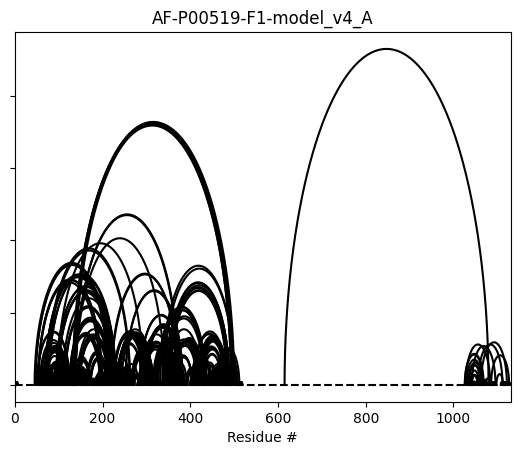

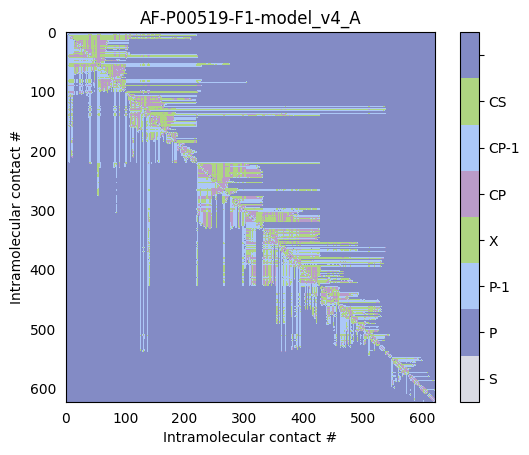

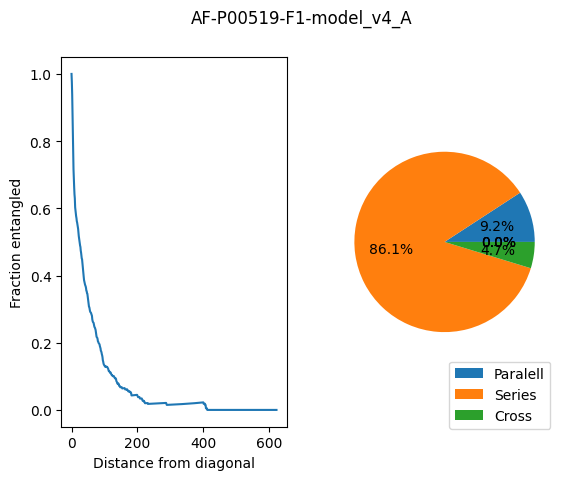

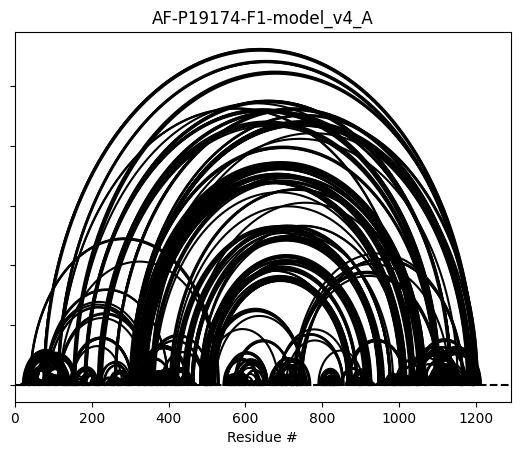

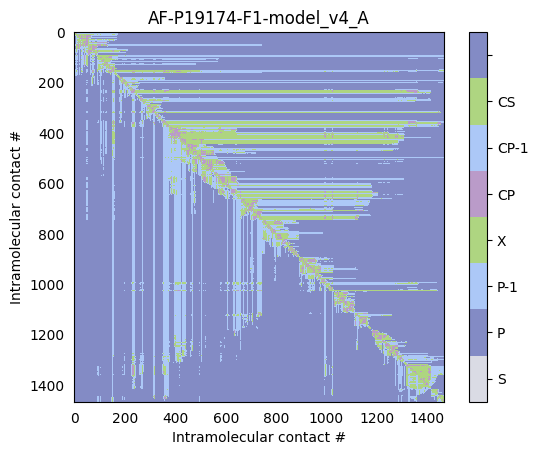

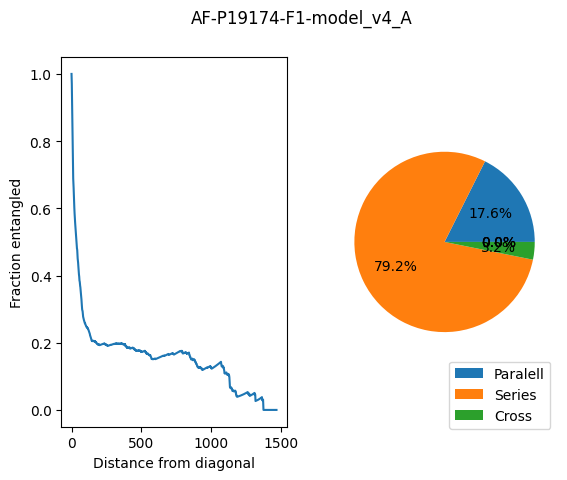

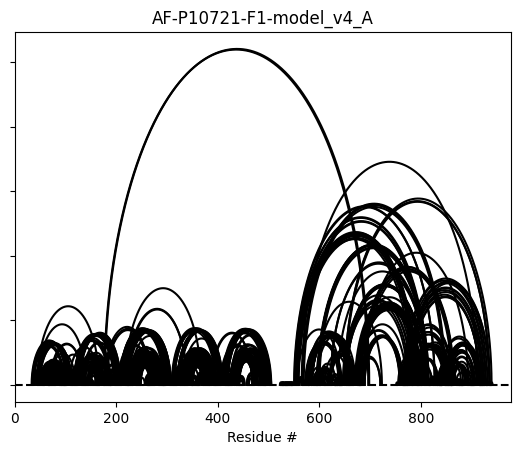

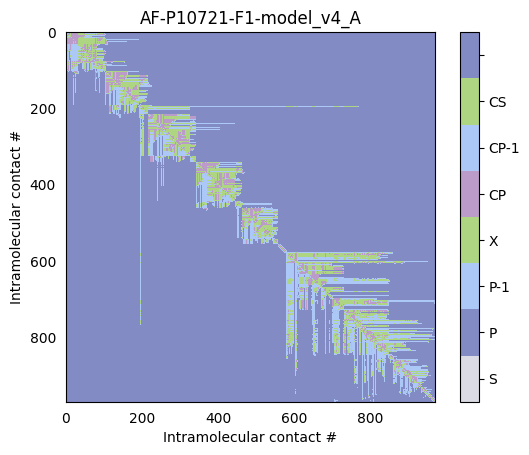

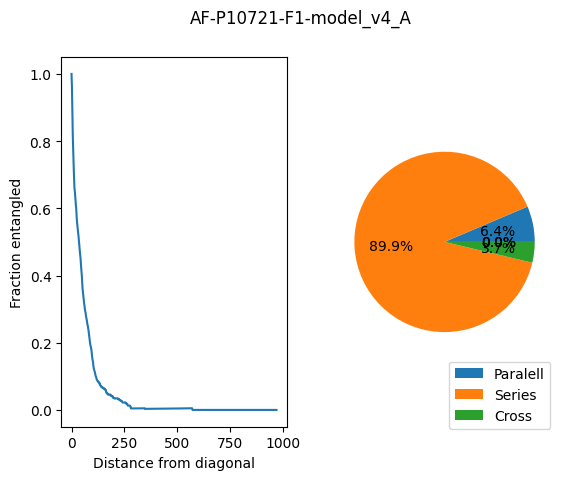

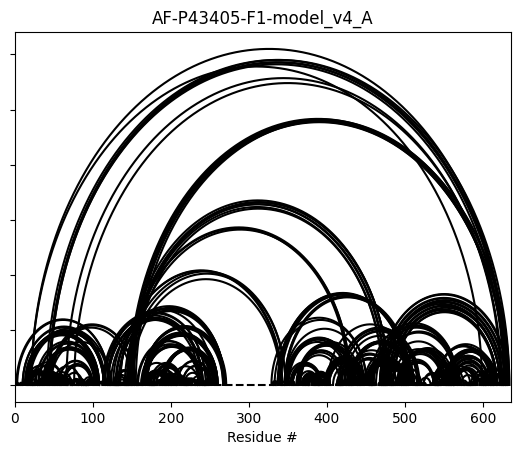

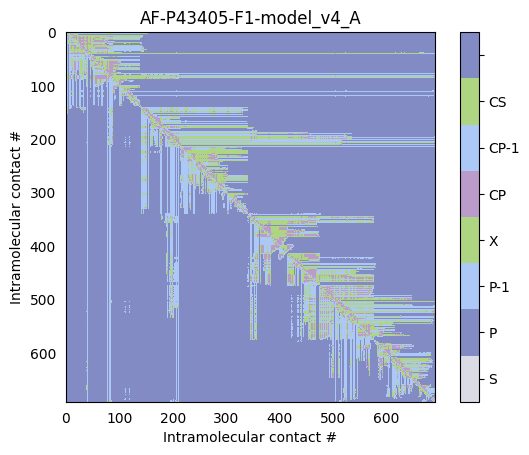

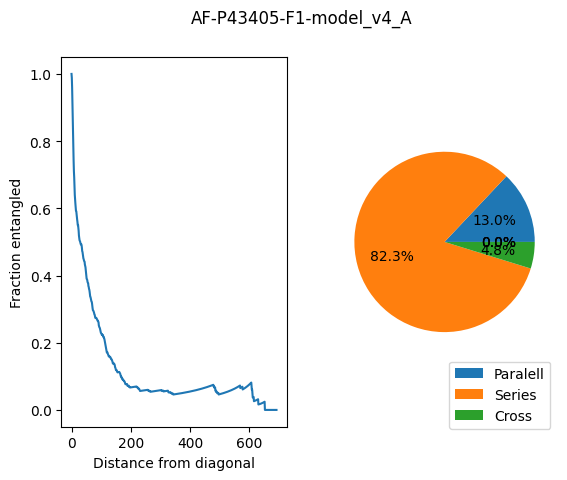

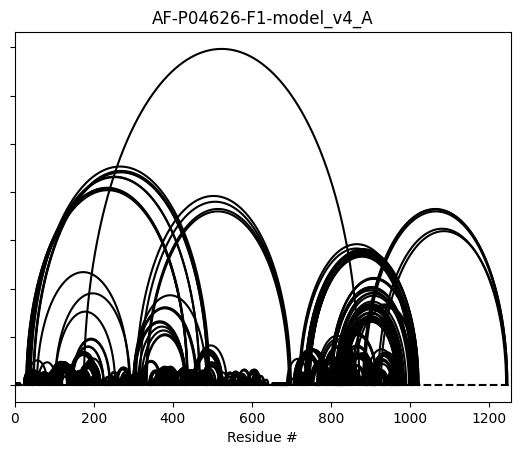

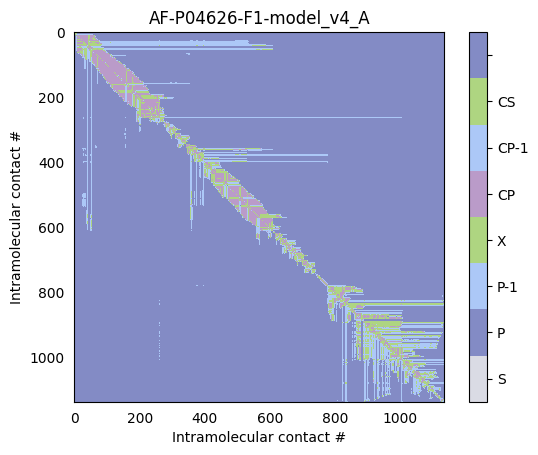

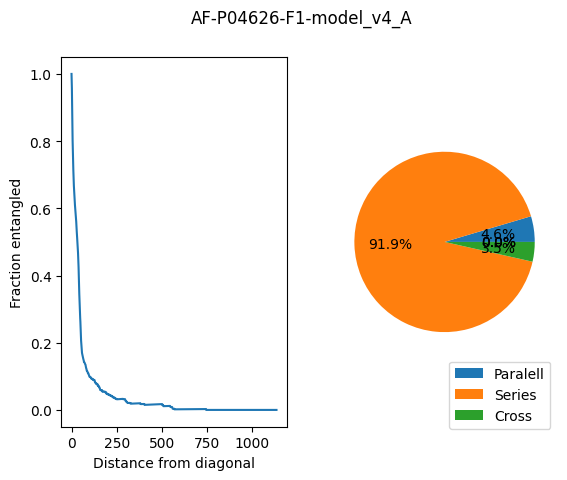

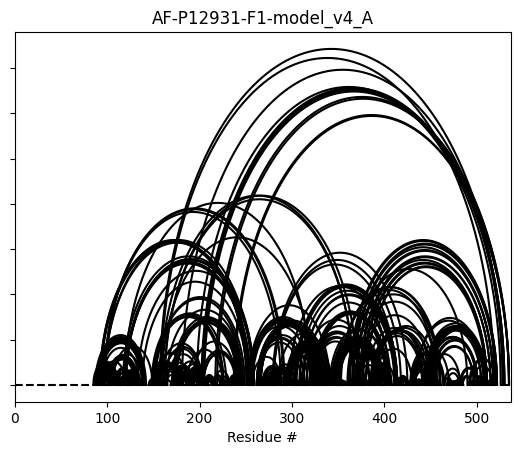

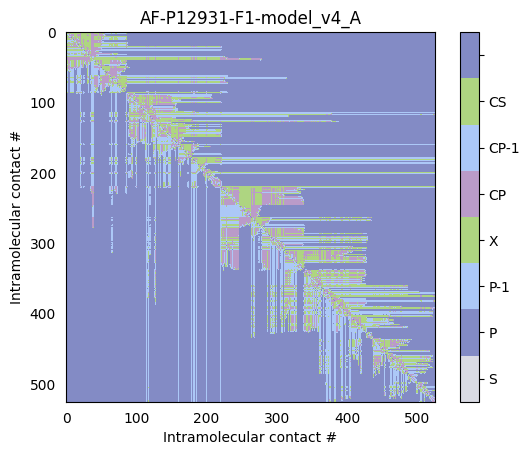

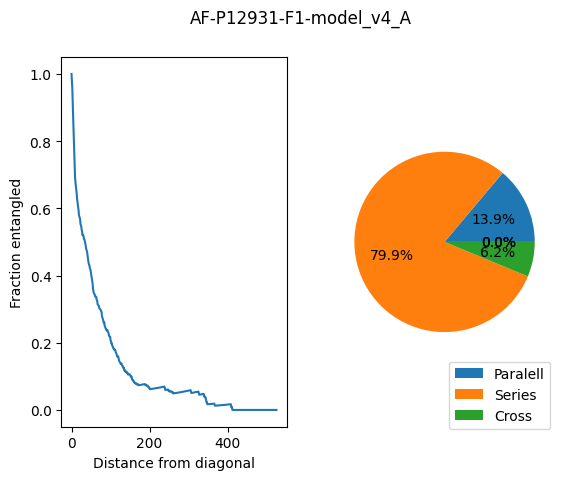

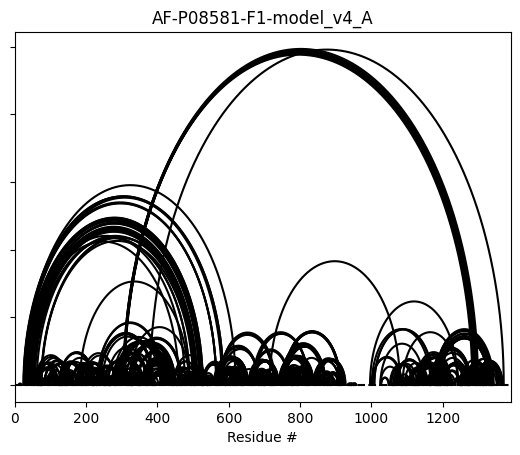

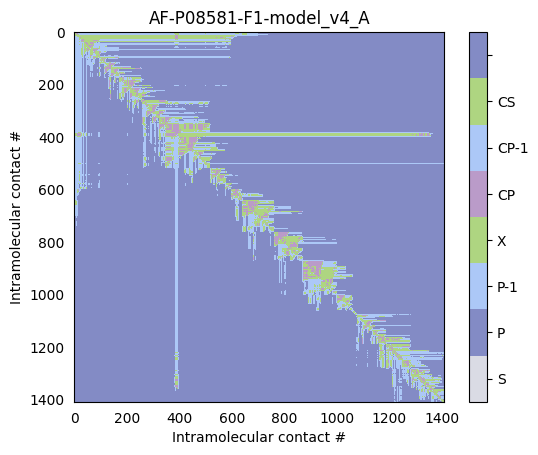

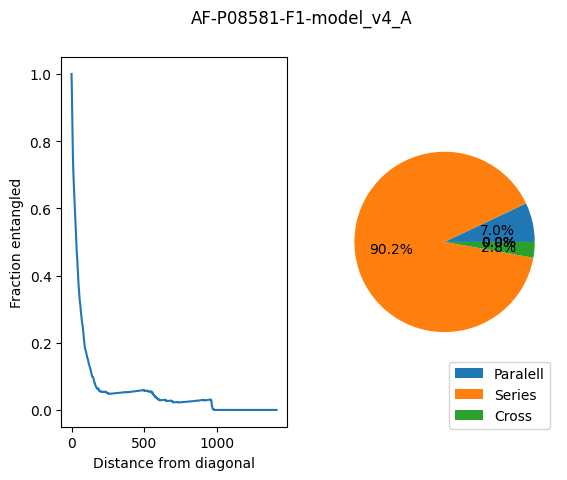

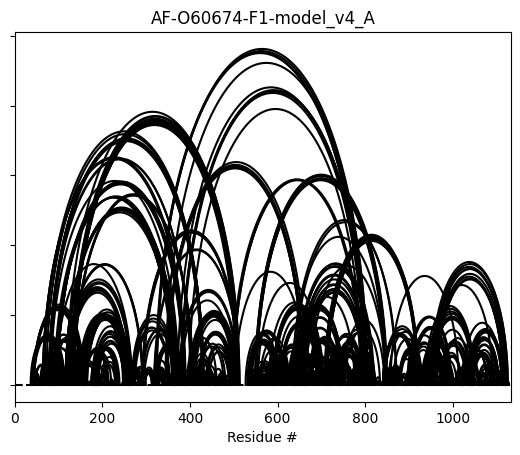

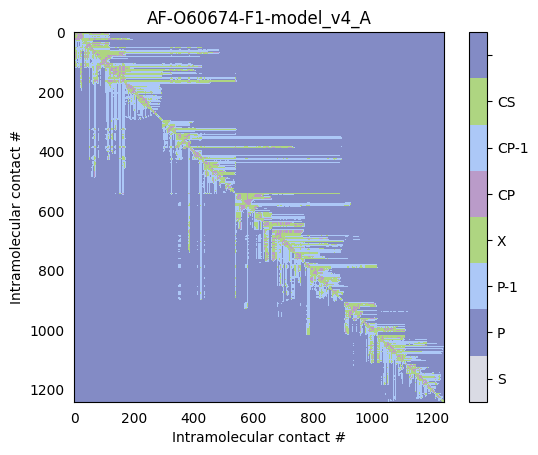

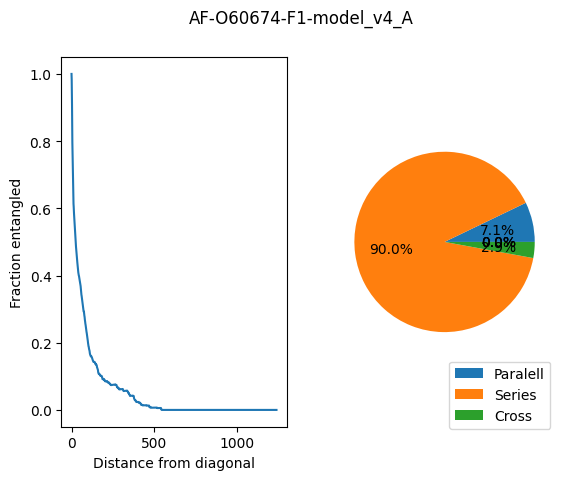

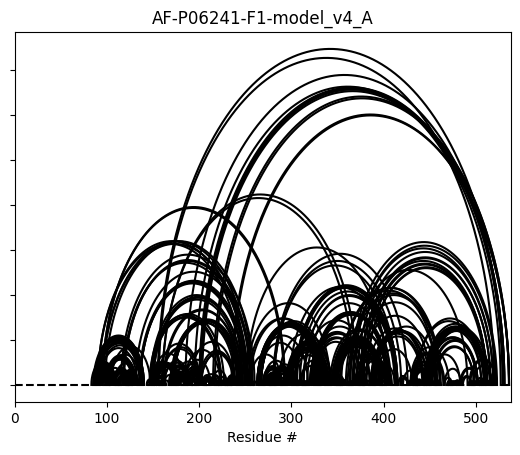

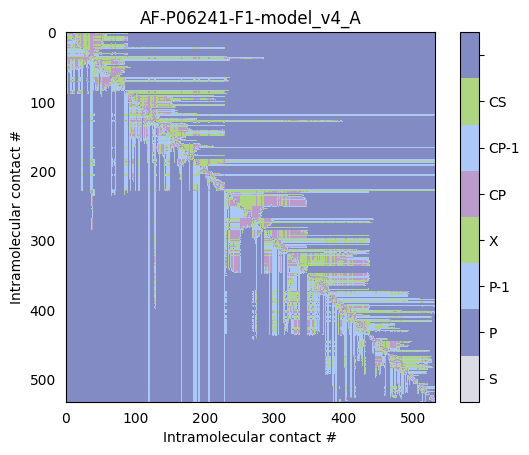

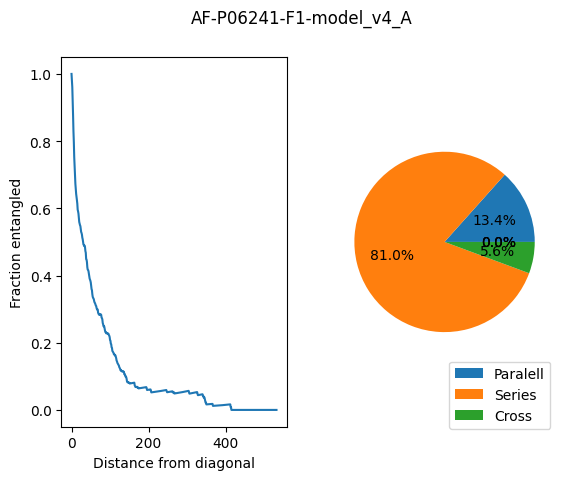

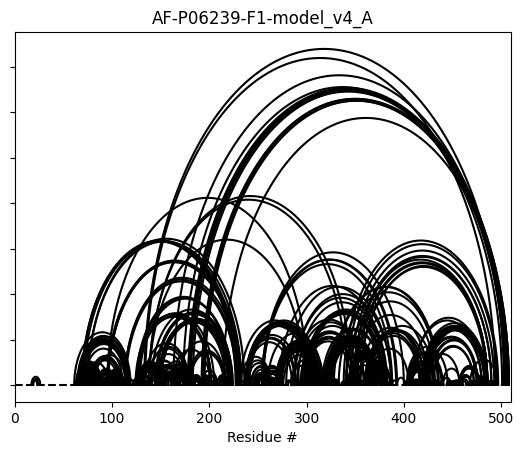

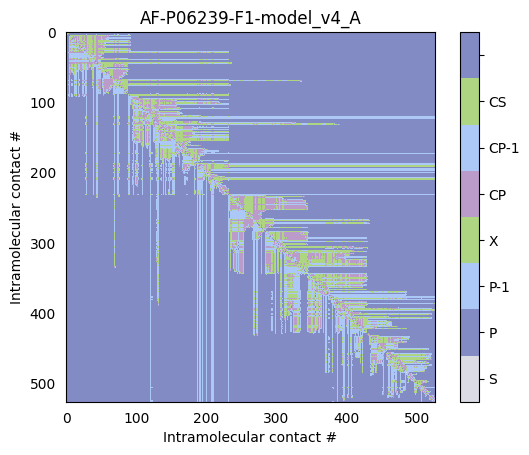

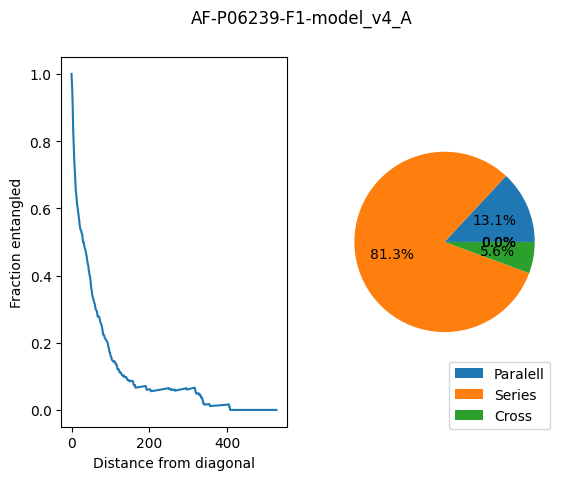

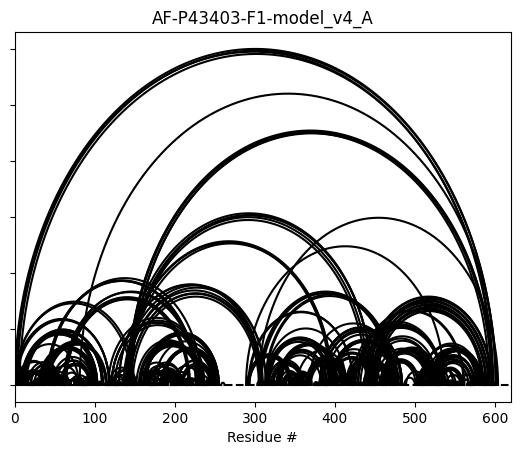

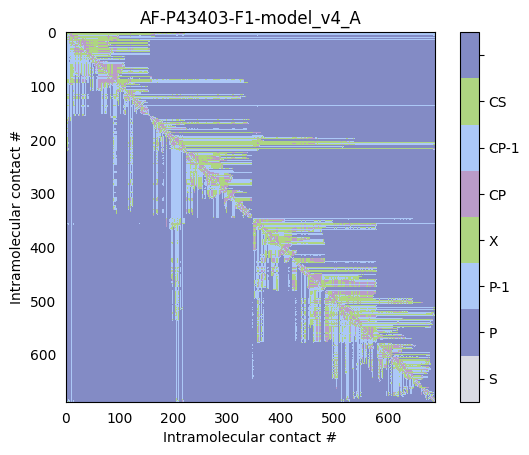

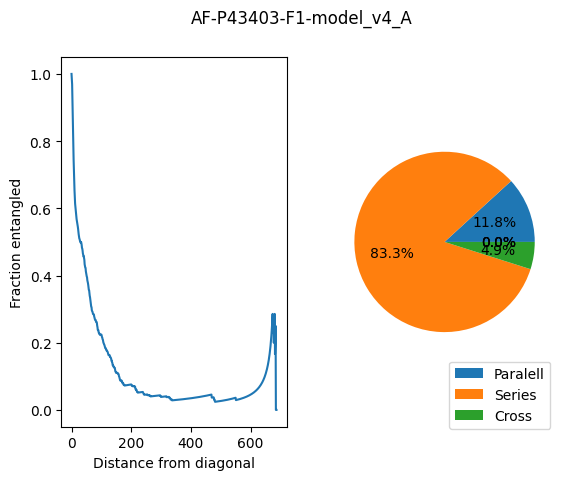

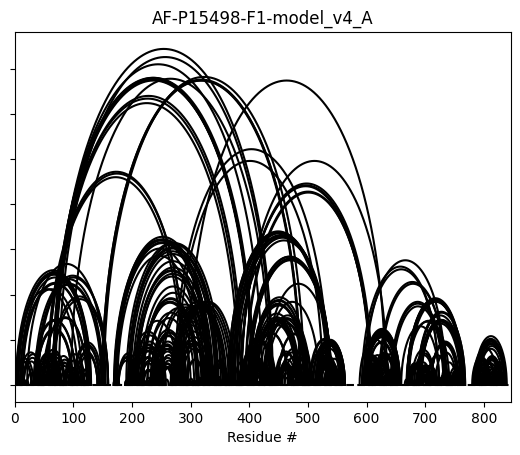

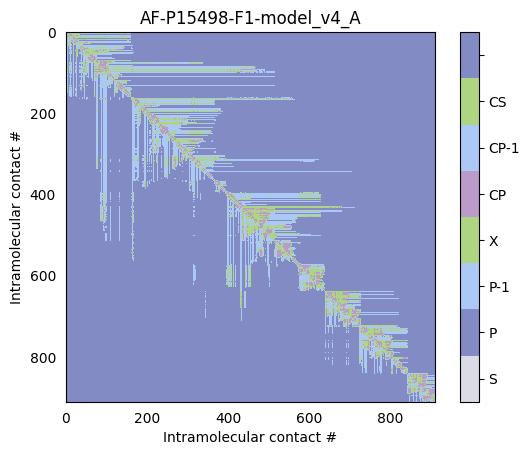

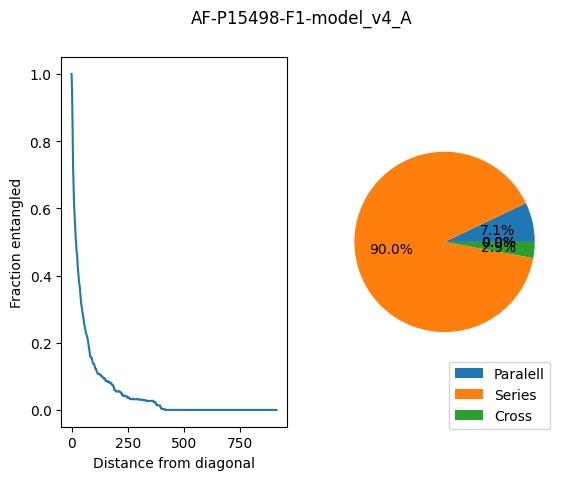

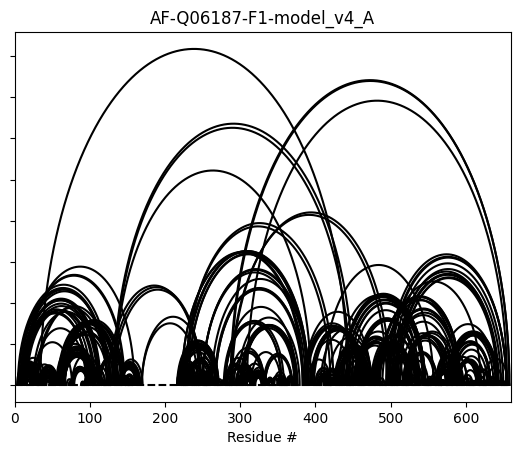

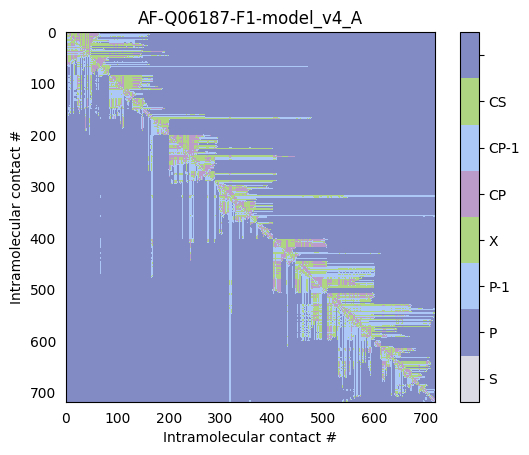

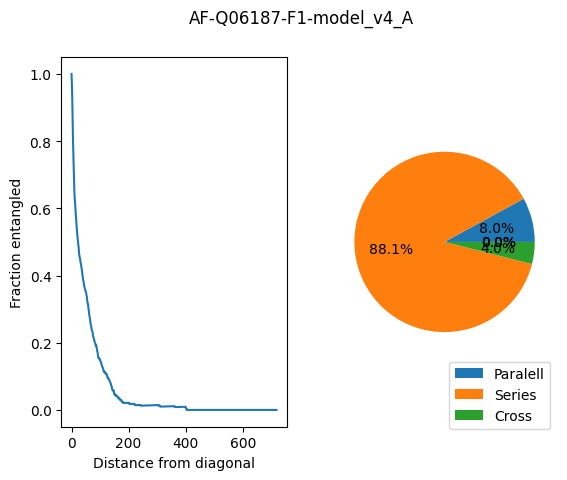

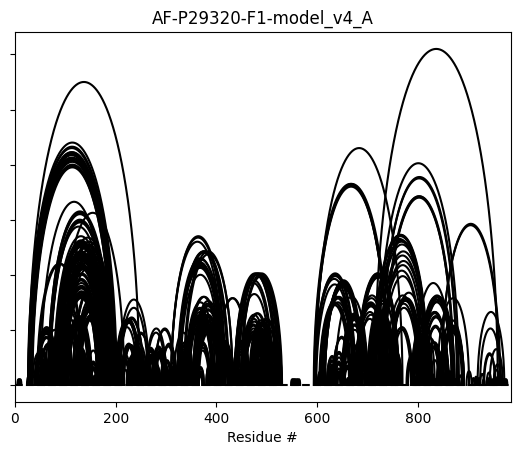

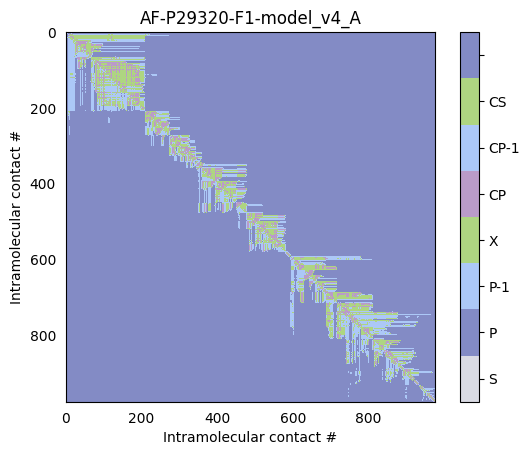

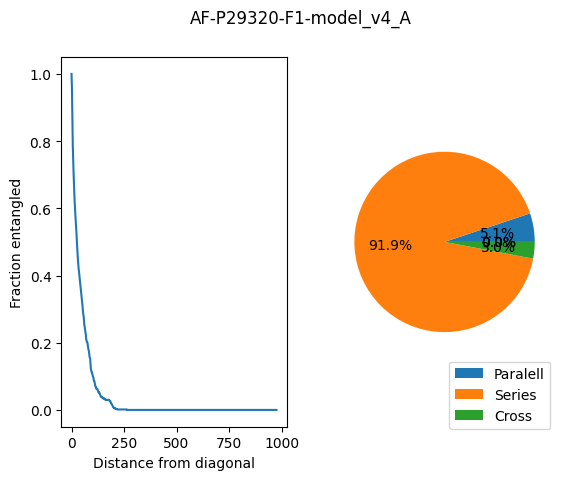

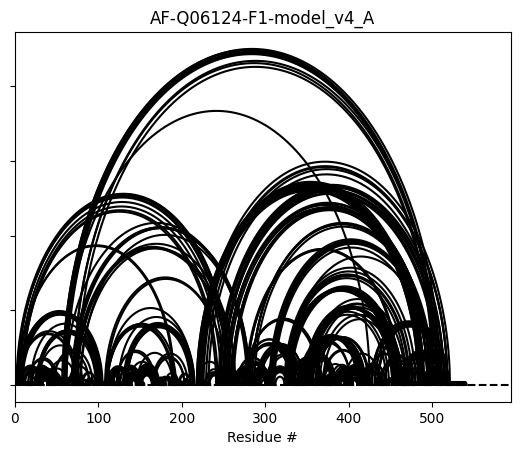

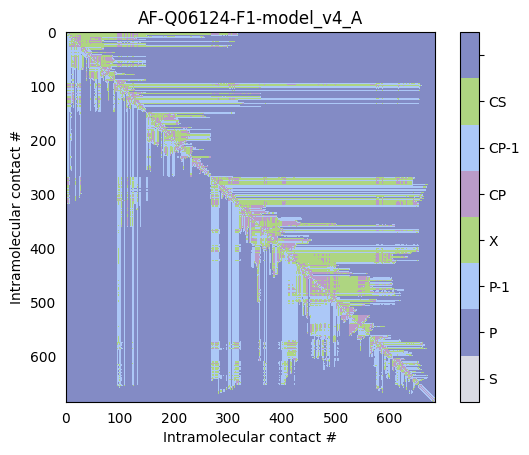

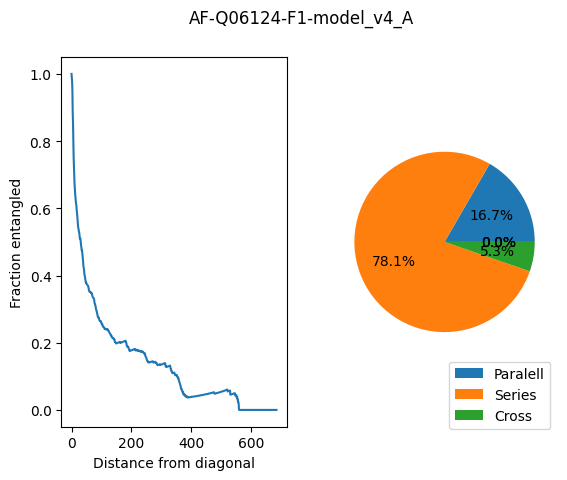

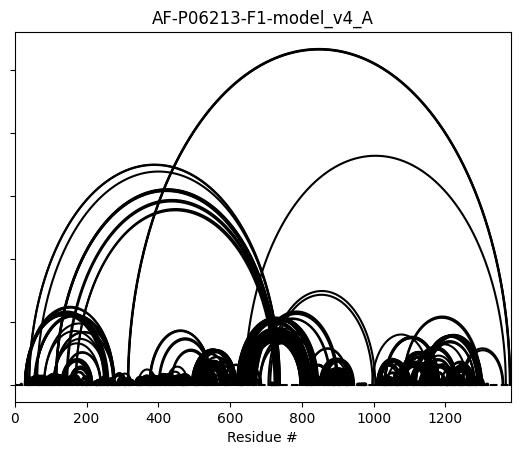

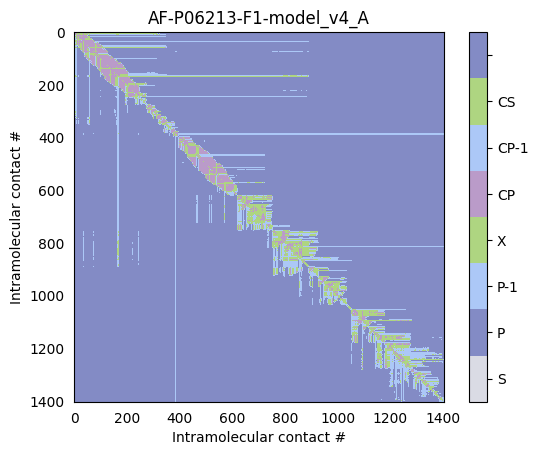

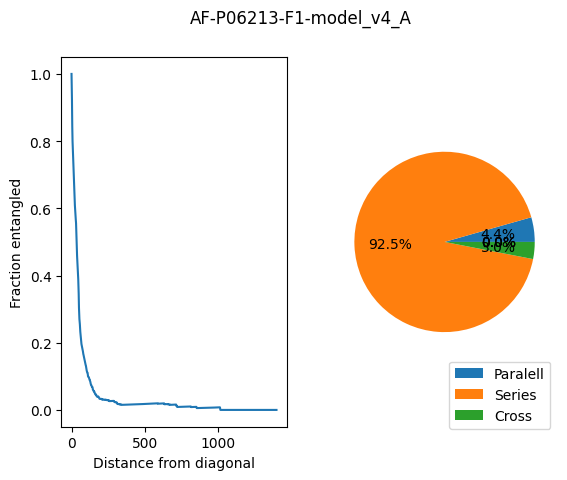

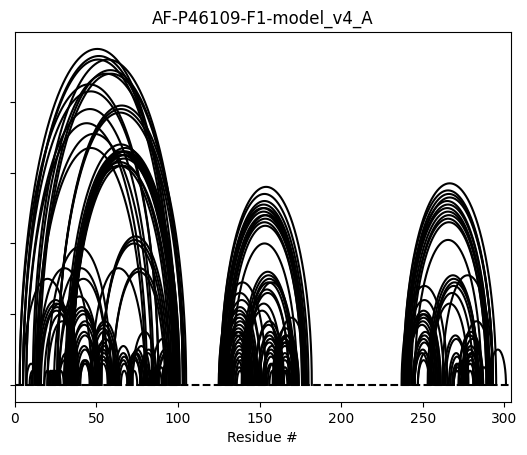

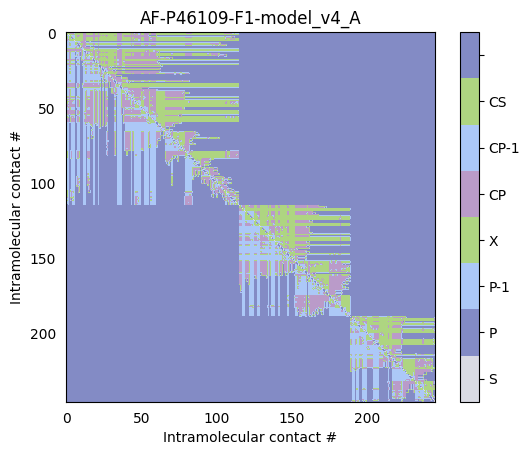

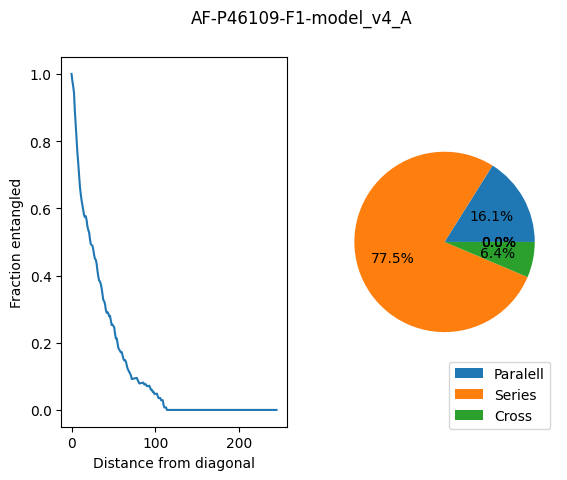

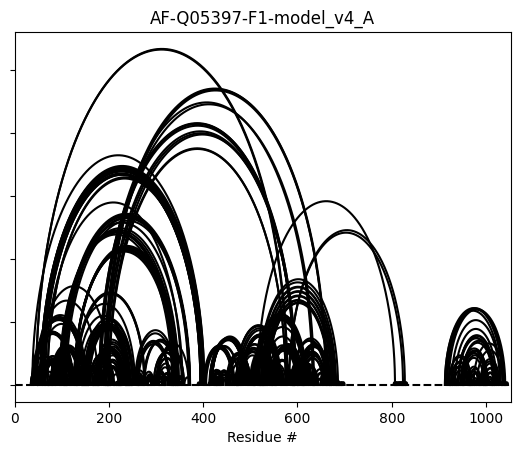

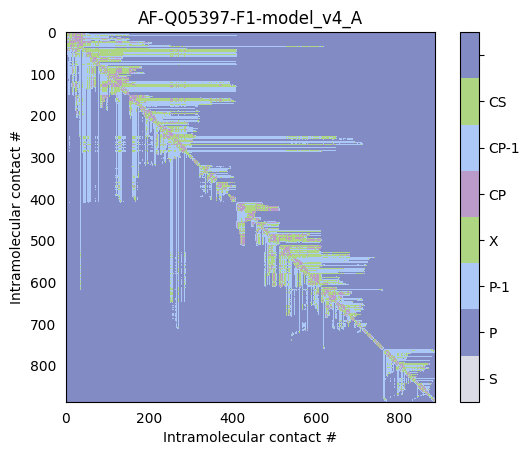

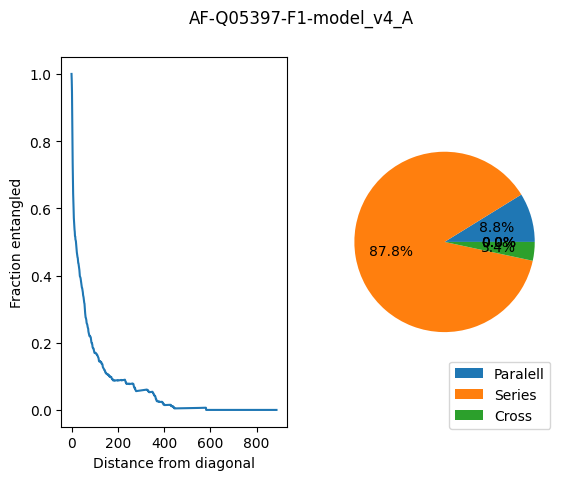

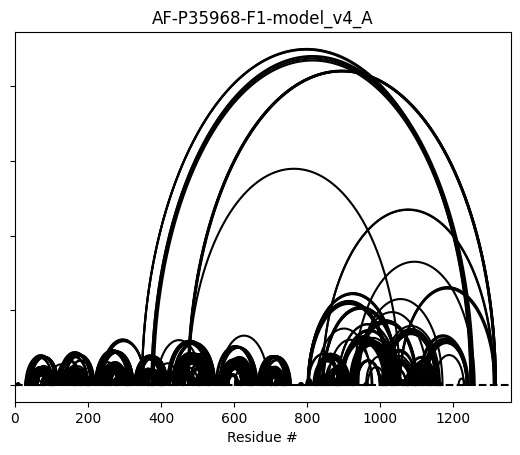

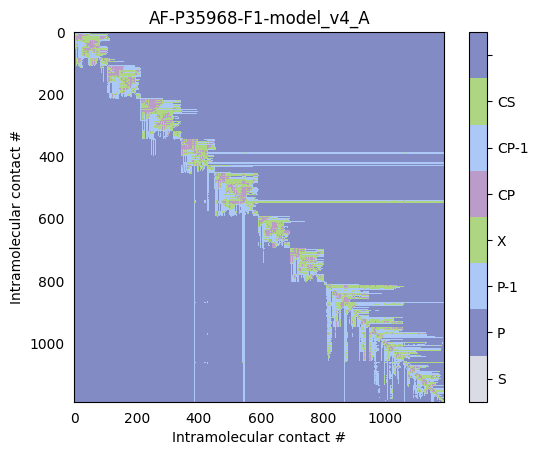

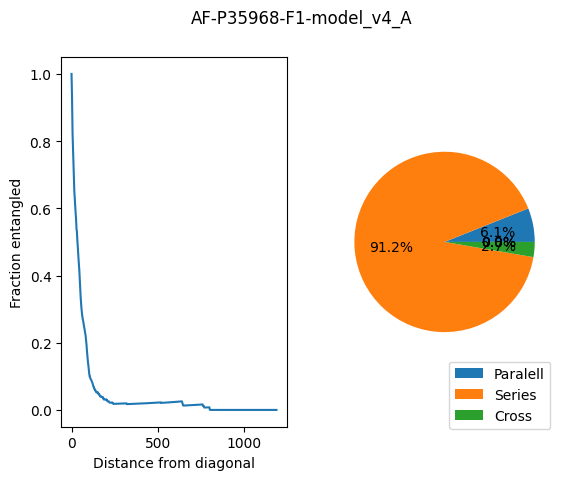

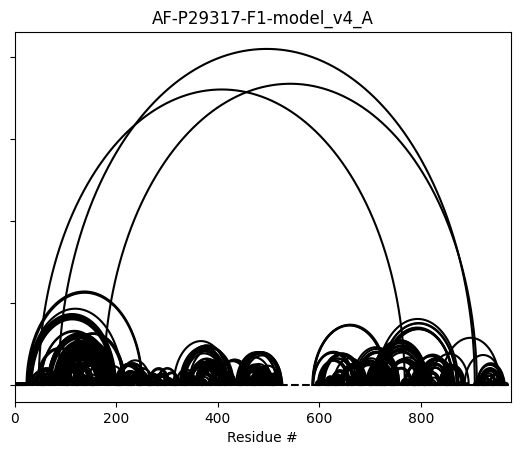

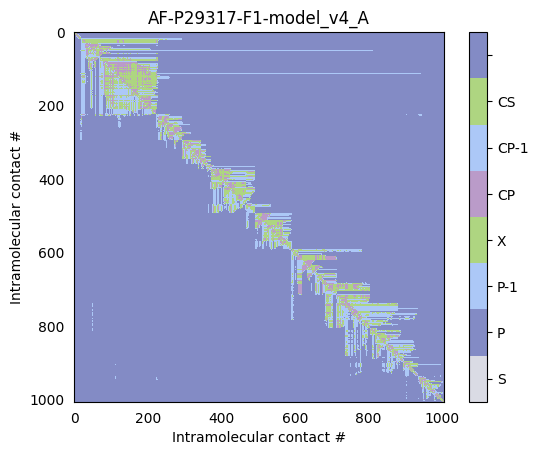

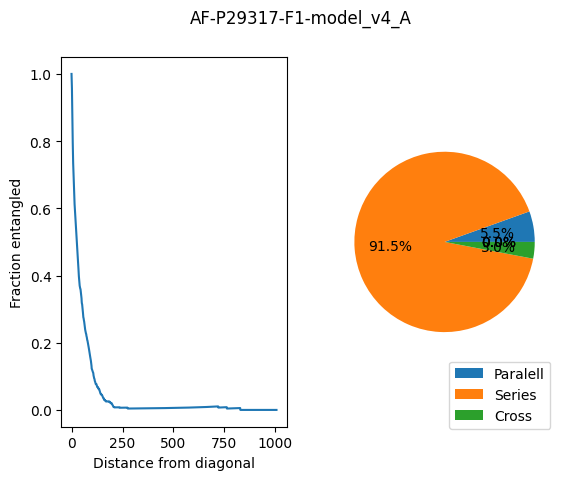

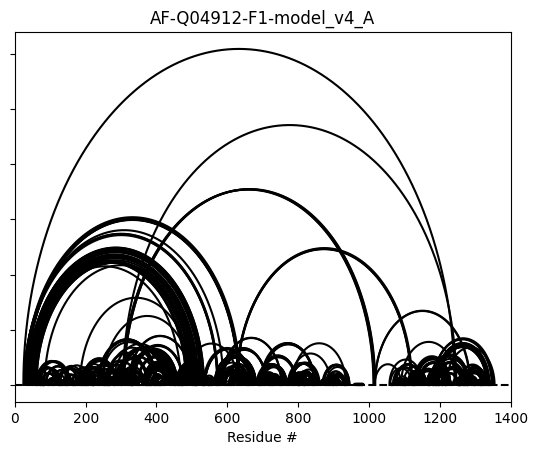

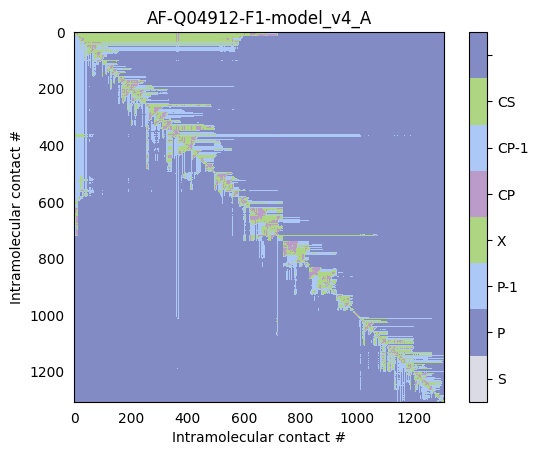

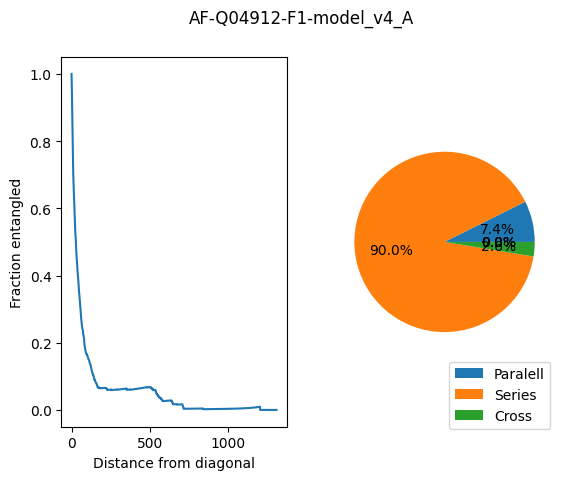

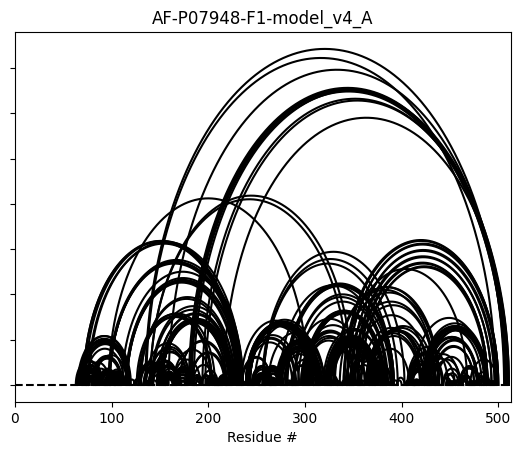

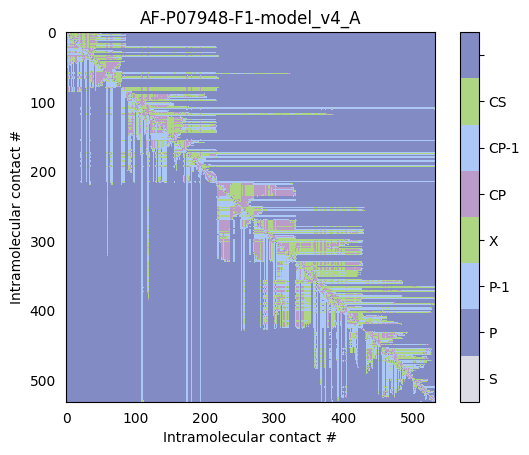

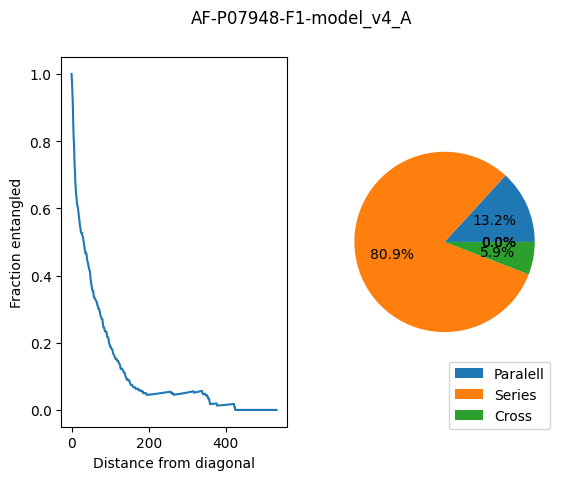

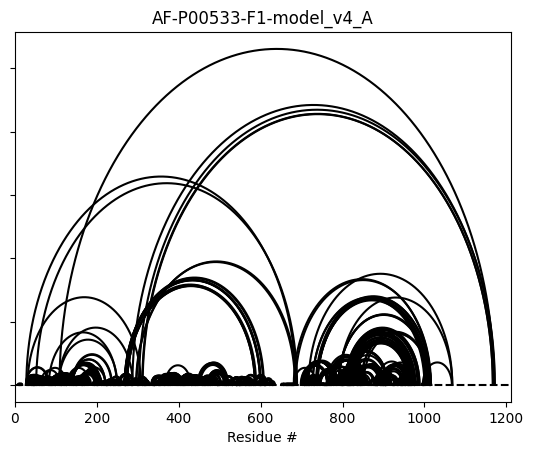

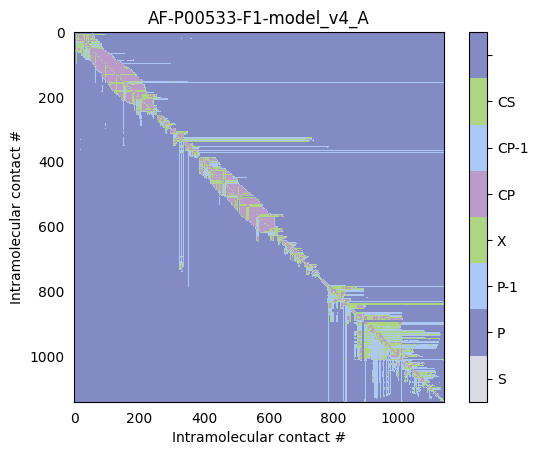

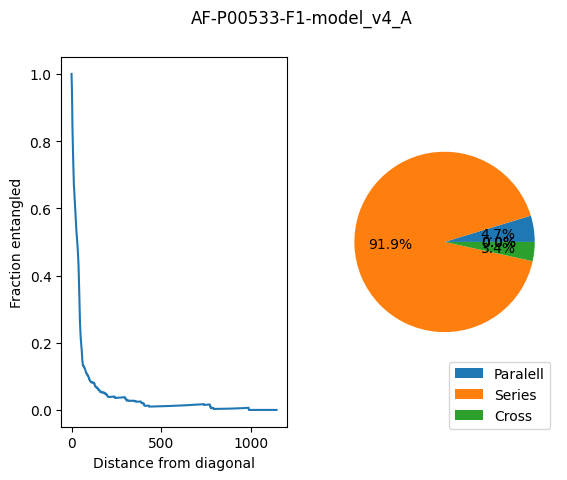

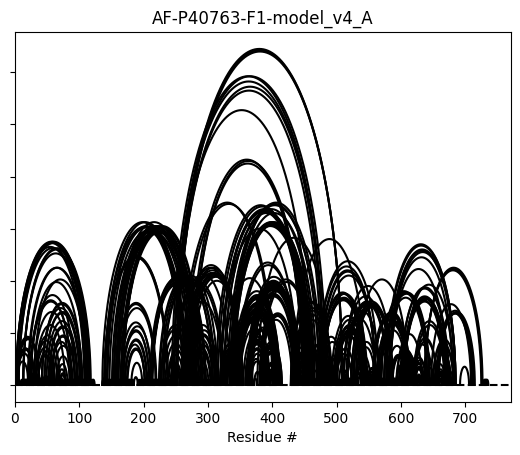

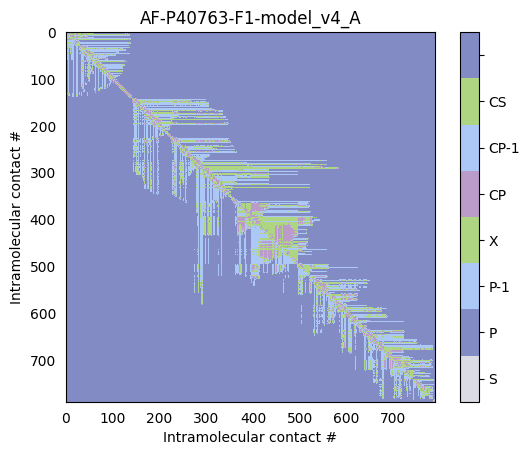

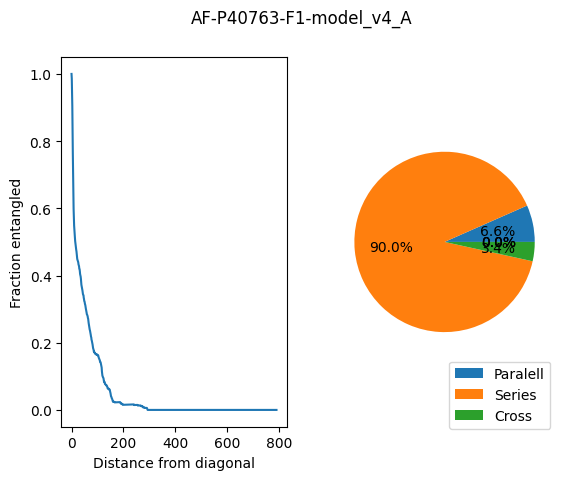

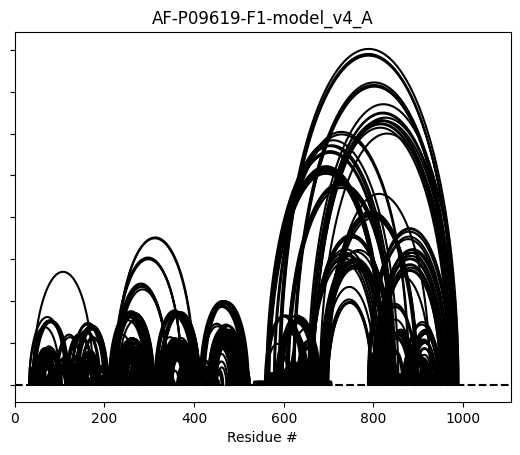

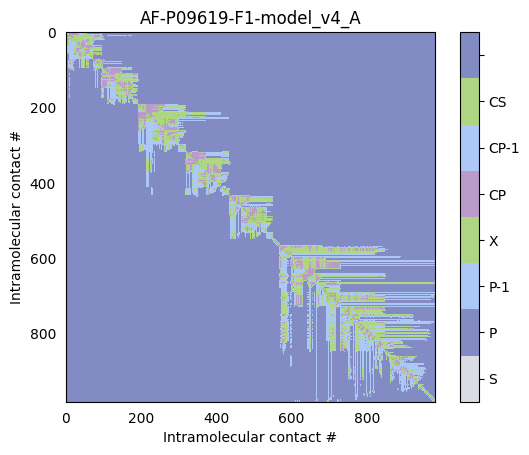

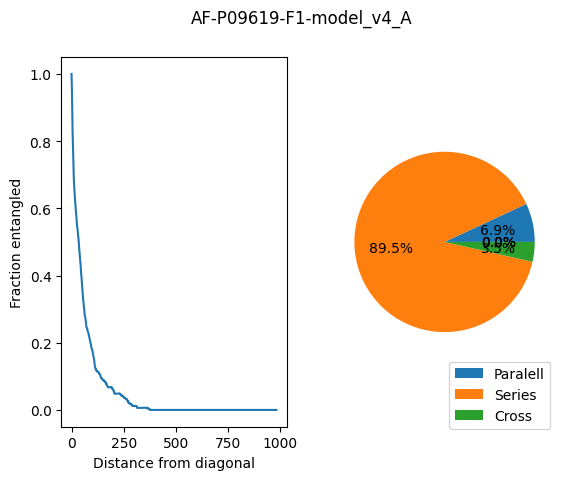

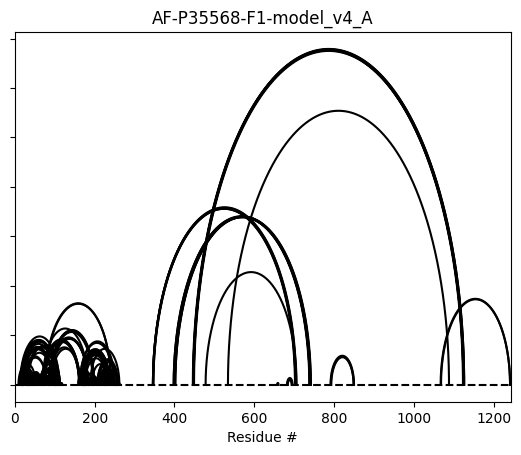

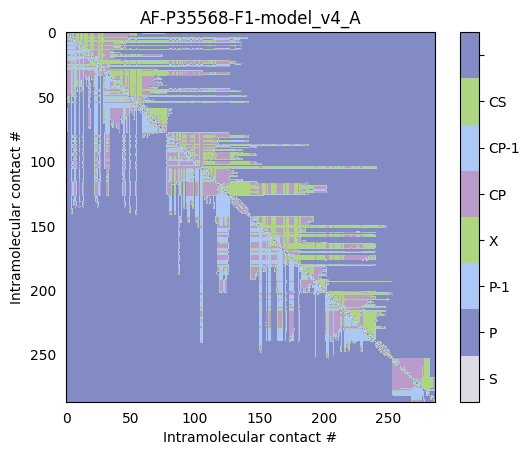

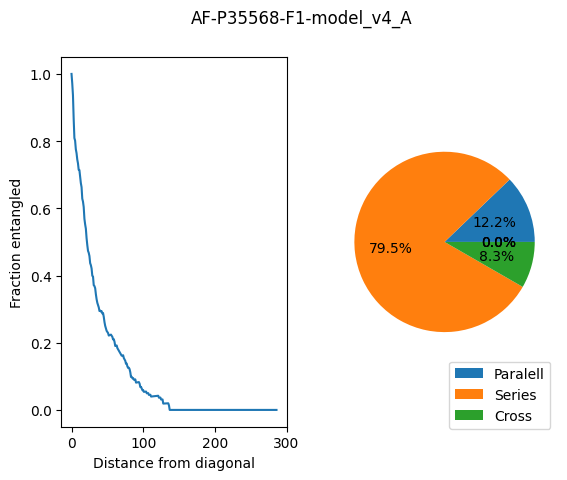

In [21]:
import os

number_of_files = len(os.listdir('/content/circuit_topology/input_files/cif'))

psclist = []



# List all files in the directory
files_list = os.listdir('/content/circuit_topology/input_files/cif')

# Filter files that start with 'AF' and end with 'cif'
filtered_files = [files for files in files_list if files.startswith('AF') and files.endswith('cif')]

# Number of filtered files
number_of_files = len(filtered_files)

for num, files in enumerate(filtered_files):
    # Creates a chain object from a CIF/PDB file
    chain, protid = retrieve_chain(files)
    print(f'{files} - {num+1}/{number_of_files}')


    #Step 1 - Draw a residue-residue based contact map
    index,numbering,protid,res_names = get_cmap(
                                                chain,
                                                cutoff_distance = cutoff_distance,
                                                cutoff_numcontacts = cutoff_numcontacts,
                                                exclude_neighbour = exclude_neighbour)
    print(len(index))
    #Step 1.5 - Energy filtering
    if energy_filtering:
        index,protid = energy_cmap(index,numbering,
                               res_names,protid,
                               energy_filtering_mode)

    #Step 2 - Lenght filtering
    if length_filtering:
        index = length_filter(index,
                              filtering_distance,
                              length_mode)

    #Step 3 - Draw a circuit topology relations matrix
    mat, psc = get_matrix(index,protid)
    psclist.append(psc)

    #Step 4 - Circuit topology statistics
    entangled = get_stats(mat)

    #Plotting
    if plot_figures:
        circuit_plot(index,protid,numbering)
        matrix_plot(mat,protid)
        stats_plot(entangled,psc,protid)

    #Exporting
    if exporting_cmap3:
        export_cmap3(index,protid,numbering)

    if exporting_mat:
        export_mat(index,mat,protid)

if exporting_psc:
    export_psc(psclist)

### <center> Multi-chain analysis </center>
-------

### <center> Local Circuit Topology </center>
-------

local_ct() Provides an overview of the number of each type of contact related to each residue

In [41]:
import os
import numpy as np
import pandas as pd
from Bio.PDB import PDBParser, Selection, NeighborSearch

# Load the CSV file
csv_file = '/content/tyrosine_phosphorylation_proteins_updated_with_additional_editeddd(5).csv'
df = pd.read_csv(csv_file)

# List all files in the directory
files_list = os.listdir('/content/circuit_topology/input_files/cif')

# Filter files that start with 'AF' and end with 'cif'
filtered_files = [files for files in files_list if files.startswith('AF') and files.endswith('cif')]

# Prepare a list to store the output data
output_data = []

# Loop over each file and generate the local topology plot based on the residue ID from the CSV
for num, file1 in enumerate(filtered_files):
    # Extract the protein ID from the file name (assuming it's the part after 'AF-' and before '_')
    protid = file1.split('-')[1].split('_')[0]
    print(protid)
    # Check if the protein ID exists in the CSV file
    if protid in df['UniProt ID'].values:
        # Get the specific residue ID for this protein from the CSV file
        res_id = df.loc[df['UniProt ID'] == protid, 'Residue Number'].values[0]
        print(res_id)
        # Retrieve the chain and other relevant data
        chain, _ = retrieve_chain(file1)

        # Generate contact map and matrix for the entire structure
        index, numbering, protid1, res_names = get_cmap(
            chain,
            cutoff_distance=cutoff_distance,
            cutoff_numcontacts=cutoff_numcontacts,
            exclude_neighbour=exclude_neighbour
        )



        # Generate the circuit topology relations matrix
        mat, psc = get_matrix(index, protid1)
        res_idY = int(res_id[1:])  # Assuming res_id[1:] is a string representation of an integer
        print(res_idY)


        print(numbering)

        # Calculate local contact topology (P, X, IP, S) for the specific residue in the CSV
        if res_idY in numbering:
            res_idx = np.where(numbering == res_idY)[0][0]
            print(res_idx)


            # Recalculate `local_ct` for all proteins, updating the index and numbering
            localct_results = local_ct(index, mat, numbering)

            p_value = localct_results[res_idx]['P']
            x_value = localct_results[res_idx]['X']
            ip_value = localct_results[res_idx]['IP']
            s_value = localct_results[res_idx]['S']
            print(f"P: {p_value}, X: {x_value}, IP: {ip_value}, S: {s_value}")

            # Store the result
            # Calculate contact order (CO) for the specific residue
            chain_length, co_value, rel_co_value = contact_order(chain, cutoff_distance)

            # Store the result in the output list
            output_data.append([protid, res_id, p_value, x_value, ip_value, s_value, co_value])


# Convert the output data to a DataFrame
output_df = pd.DataFrame(output_data, columns=['UniProt ID', 'Residue Number', 'P', 'X', 'IP', 'S', 'CO'])

# Save the output to a CSV file
output_df.to_csv('/content/output_data4.csv', index=False)

# Optionally, display the DataFrame
print(output_df)


P00519
Y393
393
[   1    2    3 ... 1128 1129 1130]
392
P: 25, X: 73, IP: 38, S: 585
P19174
Y1253
1253
[   1    2    3 ... 1288 1289 1290]
1252
P: 0, X: 0, IP: 0, S: 0
P10721
Y823
823
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 